La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'il faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`capa_num` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# Exemple d'implémentation basique

## Implémentation

In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy.integrate import odeint

def euler(f:callable, y0:float, t0: float, tf: float, pas:float) -> (ndarray, ndarray):
    tk = [t0]
    yk = [y0]
    while tk[-1] < tf:
        yk.append(yk[-1] + f(tk[-1], yk[-1]) * pas)
        tk.append(tk[-1] + pas)
    return array(tk), array(yk)

## Utilisation

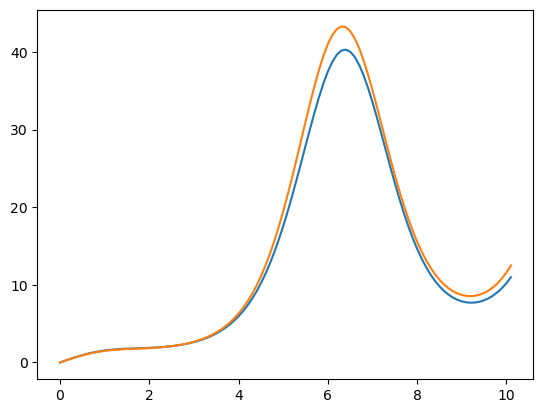

In [2]:
def f(t, y):
    return - sin(t) * y + 2

y0 = 0
t0 = 0
tf= 10
pas = 0.1
tk , yk = euler(f, y0, t0, tf, pas)
plot(tk, yk)

yk2 = odeint(f, [y0], tk, tfirst=True)
plot(tk, yk2)

_On remarquera une légère différence car `odeint` utilise une méthode plus précise. Cette différence s'estompe avec un pas pus faible (cf. suite)_

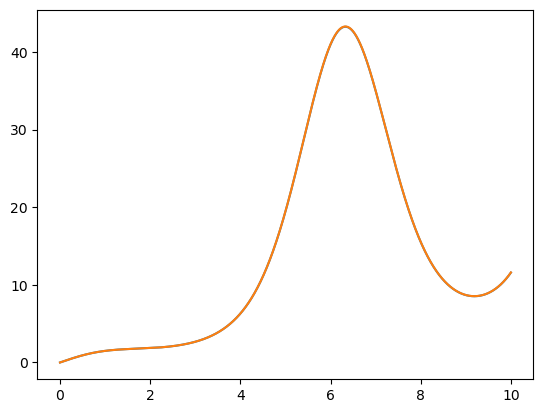

In [3]:
pas = 0.001
tk , yk = euler(f, y0, t0, tf, pas)
plot(tk, yk)

# Résolution avec odeint
yk2 = odeint(f, [y0], tk, tfirst=True)
plot(tk, yk2)

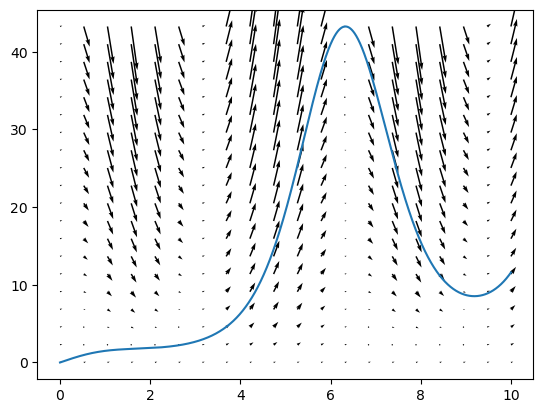

In [4]:
t, y = linspace(min(tk),max(tk),20), linspace(min(yk),max(yk),20)
tgrid, ygrid = meshgrid(t, y)
quiver(tgrid, ygrid, ones((len(t), len(y))), f(tgrid,  ygrid), angles='xy')
plot(tk, yk)

_Les "flèches" représentent la valeur de $f$, dont bien la pente puisqu'il s'agit de la dérivée._

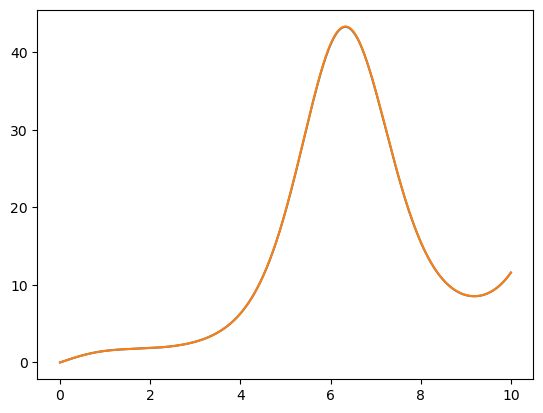

In [5]:
# avec solve_ivp
from scipy.integrate import solve_ivp
pas = 0.001
tk , yk = euler(f, y0, t0, tf, pas)
plot(tk, yk)

tks = arange(t0, tf, pas)
# Résolution avec odeint
yk2 = solve_ivp(f, (t0, tf), [y0], t_eval=tks)
plot(tks, yk2['y'][0])